<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Борис!</b>

Меня зовут Алексей, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

In [4]:
data['Tenure'].fillna(data['Tenure'].median())

0        2.0
1        1.0
2        8.0
3        1.0
4        2.0
        ... 
9995     5.0
9996    10.0
9997     7.0
9998     3.0
9999     5.0
Name: Tenure, Length: 10000, dtype: float64

In [5]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: заполнить пропуски медианой действительно можно, но стоит убедиться, что такое заполнение не исказит распределение признака. Для этого можно изучить характеристики распределения(mean, std, median) до и после заполнения, и проверить, что они изменились незначительно</div>

In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

всего 3 уникальныых страны

In [7]:
data.duplicated().sum()

0

дубликатов нет

In [8]:

for_drop = ['RowNumber','CustomerId', 'Surname']
data = data.drop(for_drop, axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


удалим столбцы, не предоставляющие ценности для алгоритма

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, эти признаки для моделей неинформативны</div>

In [9]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Данные подготовим методом OHE, что позволит нам использовать модели, деревое решений, случайный лес и логистическую регрессию.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: правильнее обучать кодировщик только на обучающей выборке, а трансформировать уже все, аналогично масштабированию, чтобы избежать проблем с кодированием. Тогда вместо get_dummies можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html" target="blank_">OneHotEncoder</a>, подробнее про различия можно почитать <a href="https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc" target="blank_">здесь</a>, а вот тут есть <a href="https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing">пример</a> использования
    
И get_dummies, и OneHotEncoder — это две реализации OHE. Но OneHotEncoder — это класс(термин из ООП), поэтому при его инициализации создается объект класса. При обучении кодировщика в его объект сохраняются категории, которые ему были переданы при обучении, поэтому при кодировании других выборок с разным набором категорий в категориальных признаках проблем уже не возникнет.
    
get_dummies же просто возвращает набор новых столбцов и никакой дополнительной информации уже не хранит. Он подходит для анализа данных, но для ML используется именно OneHotEncoder

Обрати внимание, что в следующих проектах это будет считаться критичной ошибкой
</div>

In [10]:
data.shape

(10000, 12)

выделим целевой признак

In [11]:
features = data.drop('Exited', axis=1)
target = data['Exited']

In [12]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target)


In [14]:
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target_validtest)

Разделили оставшиеся 50% выборки на тестовую и валидационную

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: с размерами выборок все окей :) Круто, что знаешь про стратификацию!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера <a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: значение random_state лучше вынести в константу, например, RANDOM_STATE. Это общее правило код-стайла не только в Практикуме, а в большинстве языков программирования: мы выносим все константные значения в переменные/константы с читаемым названием и именуем, согласно стандартам PEP-8, заглавными буквами. Так проще читать и дебажить код. Это не обязательное условие, просто полезная привычка на будущее</div>

In [15]:
from sklearn.preprocessing import StandardScaler

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: все импорты лучше выносить в начало проекта в одну ячейку, согласно стандартам PEP-8. Это общее правило код-стайла, а еще если возникнут проблемы с библиотеками, то об этом станет известно сразу
    
Тут можно почитать про PEP-8: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [17]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

/tmp/ipykernel_202/1725773446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5460,0.111187,0.193128,0.004225,0.740076,0.809174,0,1,0.368972,1,0,1
3610,-0.726970,1.626818,-1.452695,0.880243,-0.929489,1,0,0.129920,0,0,0
3892,-1.047746,0.575445,0.368455,0.766921,-0.929489,1,1,0.816963,1,0,1
4734,-0.623494,1.435659,-0.360005,-1.208445,0.809174,1,1,-0.098170,0,0,0
6102,-0.085418,-0.284769,0.368455,-1.208445,0.809174,1,1,-0.026458,0,1,0


In [18]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

/tmp/ipykernel_202/3568182040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numeric] = scaler.transform(features_valid[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4492,-0.623494,-0.667086,-1.816925,0.822924,-0.929489,1,0,0.021934,0,0,0
5970,-1.865208,-0.380348,-1.452695,0.325435,-0.929489,0,0,-1.628119,0,0,1
7940,1.352902,-0.953824,0.368455,0.361786,-0.929489,0,0,0.221934,0,1,0
9789,-0.416541,0.575445,-1.452695,-1.208445,0.809174,1,1,1.744859,0,0,0
4903,0.452659,0.288707,-0.724235,1.285614,0.809174,0,0,-0.184016,0,0,1


In [19]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

/tmp/ipykernel_202/2409317702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6120,0.669959,0.097548,0.732685,-1.208445,-0.929489,1,1,0.729660,0,0,1
3673,1.176992,-1.431721,0.732685,0.352067,-0.929489,1,0,-1.264493,0,0,1
4835,-0.923575,-0.475928,-0.360005,0.145265,0.809174,1,1,-1.223159,0,1,1
7247,-0.706275,0.097548,-0.724235,0.542889,-0.929489,1,1,1.607293,1,0,0
4943,-1.265046,0.384286,0.732685,0.341339,0.809174,1,1,1.051191,0,1,1


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что не забываешь про масштабирование!</div>

## Исследование задачи

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.metrics import accuracy_score

#матрица ошибок
from sklearn.metrics import confusion_matrix

#полнота
from sklearn.metrics import recall_score

#точность
from sklearn.metrics import precision_score

#F-1 мера
from sklearn.metrics import f1_score

#AUC-ROC
from sklearn.metrics import roc_auc_score

#ROC-кривая
from sklearn.metrics import roc_curve

In [22]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=123)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", DTC_score, "случайный лес ", RFC_score, "логистческая регрессия", LgR_score)

In [23]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.7956 случайный лес  0.862 логистческая регрессия 0.8036


In [24]:
target_train.value_counts(normalize = 1)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [25]:
target_train.value_counts(normalize = 1)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

У обучающией и валидационной выборок наблюдается заметный дисбаланс класов. Ответы 0 ≈80% , 1 ≈ 20%
Можно ожидать, что результаты предсказаний моделей будут сильно склоняться к одному варианту ответов.

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, жуткий дисбаланс!</div>

Проверка адекватности моделей

In [26]:
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=123)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "дерево решений", DTC_share, "случайный лес ", RFC_share, "логистческая регрессия", LgR_share , end='')

In [27]:
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:дерево решений 0    0.7784
1    0.2216
dtype: float64 случайный лес  0    0.872
1    0.128
dtype: float64 логистческая регрессия 0    0.9344
1    0.0656
dtype: float64

самая точная - логистическая регрессия, но ответ всегда "0", теперь попроубем с константой

In [28]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.shape

(2500,)

In [29]:
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.7964

константа показала результат лучше любой модели, наверняка проблема в дисбалансе, проверим
но спера посмотрим матрицы ошибок для каждой модели

In [30]:
for depth in range(1,11):
    model_DTC = DecisionTreeClassifier(random_state=123, max_depth = depth)
    model_DTC.fit(features_train, target_train)
    DTC_prediction = model_DTC.predict(features_valid)
    DTC_probabilities_valid = model_DTC.predict_proba(features_valid)
    DTC_probabilities_one_valid = DTC_probabilities_valid[:, 1]
    confusion_matrix(target_valid, DTC_prediction)
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, DTC_prediction)) 
    

max_depth = 1 : 0.0
max_depth = 2 : 0.4920440636474908
max_depth = 3 : 0.35239567233384855
max_depth = 4 : 0.49408672798948755
max_depth = 5 : 0.4884667571234736
max_depth = 6 : 0.5363408521303258
max_depth = 7 : 0.5611510791366907
max_depth = 8 : 0.5547785547785548
max_depth = 9 : 0.5494994438264739
max_depth = 10 : 0.5293489861259338


готово

<div class="alert alert-success">
<h2>Комментарий ревьюера v5<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: лайк за проверку на адекватность!</div>

In [31]:
def rec_prec_f1(model, features, target):
    predictions = model.predict(features)
    probabilities_one = model.predict_proba(features)[:, 1]
    print('F1', f1_score(target_valid, predictions))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_one))
    
best_dt = None
best_f1 = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    probabilities_one = model.predict_proba(features)[:, 1]
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1:
        best_dt = model
        best_f1 = f1

rec_prec_f1(best_dt, features_valid, target_valid)

F1 0.5669856459330144
AUC-ROC 0.8333951702109395


<div class="alert alert-success">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь с функцией полный порядок :)</div>

не понимаю суть ошибки, с каждой итерацией чуть лучше, но тяжело воспринимается

<div class="alert alert-warning">
<h2>Комментарий ревьюера v6<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: также функцию `rec_prec_f1` можно написать иначе, и передавать в нее не предсказания модели, а обученную модель и выборку, для которой нужно делать предсказания, например:

    def rec_prec_f1(model, features, target):
        predictions = model.predict(features)
        probabilities_one = model.predict_proba(features)[:, 1]
        print('F1', f1_score(...))
        print('AUC-ROC', roc_auc_score(...))
        ...
    
    # подбираем гиперпараметры
    best_dt = None
    best_f1 = 0
    ...
    
    # вызываем функцию, передавая в качестве аргументов переменную с обученной моделью и выборку
    rec_prec_f1(best_dt, features_valid, target_valid)
        
</div>

In [32]:
probabilities_valid = model_DTC.predict_proba(features_valid)
DTC_probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,DTC_probabilities_one_valid)
auc_roc

0.7752247589595221

Исправлено: вывод rec_prec_f1, подбор гиперпараметров а также подсчет Auc-Roc через predict_proba

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: а если вместо вероятностей класса «1» передавать методу бинарные предсказания, то численно полученное значение равно другой метрике, так называемой сбалансированной, «честной» точности или <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html" target="blank_">balanced_accuracy_score</a></div>

Низкое значние F1- меры свидетельствует о низком качестве модели, проблема в точности.

In [33]:
for depth in range(1,11):  
    for j in range(1,101,10): 
        model_RFC = RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators = j)
        model_RFC.fit(features_train, target_train)
        RFC_prediction = model_RFC.predict(features_valid)
        print("max_depth =", depth, ": ", end='')
        print("n_estimatores = j", depth, ": ", end='')
        print(accuracy_score(target_valid, RFC_prediction)) 
confusion_matrix(target_valid, RFC_prediction)

max_depth = 1 : n_estimatores = j 1 : 0.8224
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 1 : n_estimatores = j 1 : 0.7964
max_depth = 2 : n_estimatores = j 2 : 0.8224
max_depth = 2 : n_estimatores = j 2 : 0.814
max_depth = 2 : n_estimatores = j 2 : 0.8064
max_depth = 2 : n_estimatores = j 2 : 0.804
max_depth = 2 : n_estimatores = j 2 : 0.8076
max_depth = 2 : n_estimatores = j 2 : 0.8072
max_depth = 2 : n_estimatores = j 2 : 0.8076
max_depth = 2 : n_estimatores = j 2 : 0.8064
max_depth = 2 : n_estimatores = j 2 : 0.8068
max_depth = 2 : n_estimatores = j 2 : 0.804
max_depth = 3 : n_estimatores = j 3 : 0.82
max_depth = 3 : n_estimatores = j 3 : 0.826
max_depth = 3 : 

array([[1928,   63],
       [ 277,  232]])

<div class="alert alert-success">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [34]:
rec_prec_f1(best_dt, features_valid, target_valid)

F1 0.5669856459330144
AUC-ROC 0.8333951702109395


<div class="alert alert-success">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

опять низкая f1

In [35]:

model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1918,   73],
       [ 418,   91]])

In [36]:
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)

auc_roc_LgR

0.7575070133873553

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: в остальном все окей, посмотрим, как повлияет борьба с дисбалансом</div>

## Борьба с дисбалансом

In [37]:
from sklearn.utils import shuffle

Как мы выяснили ранее в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%.
Нам необходмо увеличить количество положительных ответов в 4 раза для достижения баланса.

Разделим обучающую выборку на отрицательные и положительные объекты;
Скопируем несколько раз положительные объекты;
С учётом полученных данных создадим новую обучающую выборку;
Перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.
Обучим новые модели

In [38]:
#Ознакомимся с пероначальным распределением классов
target_train.value_counts(normalize = 1)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [39]:
#создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled
    "Функция принимаем значение признаков (features[]), целевого признака (target[]), repeat(int / float), "
    " класс который будет увеличен (upsampled_сlass (0 or 1))"

In [40]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.939857
1    0.060143
Name: Exited, dtype: float64
(16943,)


In [41]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [42]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1    0.505895
0    0.494105
Name: Exited, dtype: float64
(8057,)


<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: коэффициент увеличения выборки подобран верно!</div>

Мы получили сбалансированное количество классов, перейдем к обучению моеделей на новы данных

In [43]:
#точность моделей на выборке с дисбалансом
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.7956 случайный лес  0.862 логистческая регрессия 0.8036


In [44]:
#точность моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.7936 случайный лес  0.8496 логистческая регрессия 0.7048


<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: так как в исходной выборке есть дисбаланс классов, то accuracy в этом проекте уже не будет показательна, изучать ее не обязательно</div>

In [45]:
#Решающее дерево
for depth in range(1,11):  
    model_DTC_upsampled = DecisionTreeClassifier(random_state=123, max_depth = depth)
    model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
    DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
    rec_prec_f1(model_DTC_upsampled, features_valid, target_valid)
    
    

F1 0.46021220159151194
AUC-ROC 0.6771276244080682
F1 0.48172323759791136
AUC-ROC 0.7331064446196489
F1 0.48172323759791136
AUC-ROC 0.7791347902496402
F1 0.5308194343727339
AUC-ROC 0.8070092429686042
F1 0.5561797752808989
AUC-ROC 0.834068139634248
F1 0.5423728813559322
AUC-ROC 0.820846066631867
F1 0.5496503496503496
AUC-ROC 0.7979276094093362
F1 0.5323741007194245
AUC-ROC 0.7847603015139839
F1 0.5254730713245997
AUC-ROC 0.7653241156915354
F1 0.538109756097561
AUC-ROC 0.7461138976079984


In [46]:
#Случайный лес
for depth in range(1,11):  
    for j in range(1,100,10):
        model_RFC_upsampled = RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators = j)
        model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
        RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
        rec_prec_f1(model_RFC_upsampled, features_valid, target_valid)

F1 0.4008810572687225
AUC-ROC 0.6207481801702948
F1 0.46739832149774047
AUC-ROC 0.7687802379864597
F1 0.517120894479385
AUC-ROC 0.7855087579767105
F1 0.49612403100775193
AUC-ROC 0.7864614734872741
F1 0.523224043715847
AUC-ROC 0.7984140814411413
F1 0.5060080106809078
AUC-ROC 0.7949199689368367
F1 0.5076411960132889
AUC-ROC 0.7924214959459019
F1 0.5145565335138795
AUC-ROC 0.7898090523268263
F1 0.525085910652921
AUC-ROC 0.7953793051047986
F1 0.5069490403706154
AUC-ROC 0.7923257803534371
F1 0.418957345971564
AUC-ROC 0.6876055215068989
F1 0.5175953079178887
AUC-ROC 0.8030474068475132
F1 0.5280112044817927
AUC-ROC 0.8016684115849416
F1 0.5383542538354253
AUC-ROC 0.810663210379912
F1 0.562874251497006
AUC-ROC 0.8237831538583744
F1 0.5497494631352898
AUC-ROC 0.8206151650995295
F1 0.5445544554455446
AUC-ROC 0.8206654897924748
F1 0.5364511691884457
AUC-ROC 0.8169044590638226
F1 0.54239663629993
AUC-ROC 0.8201336268611502
F1 0.542043085476025
AUC-ROC 0.819057566514936
F1 0.5138190954773869
AUC-RO

In [47]:
#Логистическая регрессия
model_LgR_upsampled = LogisticRegression(solver = 'liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
rec_prec_f1(model_LgR_upsampled, features_valid, target_valid)

F1 0.4896265560165975
AUC-ROC 0.7599374000290107


Попробуем второй способ борьбы с дисбалансом классов

In [48]:
#Логистическая регрессия
model_LgR_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_LgR_balanced.fit(features_train, target_train)
LgR_predicted_valid_balanced = model_LgR_balanced.predict(features_valid)
rec_prec_f1(model_LgR_balanced, features_valid, target_valid)

F1 0.49297752808988765
AUC-ROC 0.7599344397529552


In [49]:
#Случайный лес
for depth in range(1,11):  
    for j in range(1,100,10):
        model_RFC_balanced = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
        model_RFC_balanced.fit(features_train, target_train)
        RFC_prediction_valid_balanced = model_RFC_balanced.predict(features_valid)
        rec_prec_f1(model_RFC_balanced, features_valid, target_valid)
        

F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.5597014925373134
AUC-ROC 0.8466276041795151
F1 0.559701492537313

<div class="alert alert-warning">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: обрати внимание, что в ячейке выше ты перебираешь гиперпараметры в цикле, но не применяешь их к модели, не забудь поправить</div>

In [50]:
#Решающее дерево
for depth in range(1,11):  
    model_DTC_balanced = DecisionTreeClassifier(random_state=123, class_weight = 'balanced')
    model_DTC_balanced.fit(features_train, target_train)
    DTC_predicted_valid_balanced = model_DTC_balanced.predict(features_valid)
    rec_prec_f1(model_DTC_balanced, features_valid, target_valid)
    

F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474
F1 0.49951409135082603
AUC-ROC 0.6864085832217474


<div class="alert alert-warning">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: здесь также необходимо передать найденную глубину дерева при инициализации модели в качестве аргумента max_depth</div>

исправлено

<div class="alert alert-success">
<h2>Комментарий ревьюера v5<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Показаели всех моделей улучшились.
Лучшие результаты показывает алгоритм случайный лес (RandomForestClassifier) а способ борьбы с дисбалансом - первый(улучшение классов)

Улучшение модели

In [51]:
from itertools import product
import tqdm

In [52]:
def RandomForestQuality(features_train, target_train, features_valid, target_valid):
    
    #Параметры для перебора
    bootstrap = [True, False]
    class_weight = ['balanced_subsample', None]
    max_features = ['auto', 'sqrt', 'log2'] 
    max_depth = [] #диапазон изменения параметра мксимальной глубины каждого дерева
    for i in range(1, 20):
        max_depth.append(i)

    #Метод itertools.product для перебора нескольких параметров
    myproduct = product(bootstrap, class_weight, max_features, max_depth)
    
    #Строки, котоыре будут наполняться циклом при переборе параметров
    bootstrap_table = []
    class_weight_table = []
    features_table = []
    depth_table = []
    f1_table = []
    recall_table = []
    precision_table = []
    score_train_table = []
    score_valid_table = []
    
    #Цикл перебора всех параметров: bootstrap, class_weight, max_features, max_depth
    for p in tqdm.tqdm(myproduct,):
        #Обучение модели
        model_forest = RandomForestClassifier(
            bootstrap=p[0] , class_weight= p[1], max_features = p[2], max_depth = p[3], 
            n_estimators = 10, random_state=12345)
        model_forest.fit(features_train, target_train)
        prediction = model_forest.predict(features_valid) #предсказание целевого признака
        
        #расчет параметров
        f1 = f1_score(target_valid, prediction)
        recall = recall_score(target_valid, prediction)
        precision = precision_score(target_valid, prediction)
        score_train = model_forest.score(features_train, target_train)
        score_valid = model_forest.score(features_valid, target_valid)
        
        #внесение значиний параметров в строки
        bootstrap_table.append(p[0])
        class_weight_table.append(p[1])
        features_table.append(p[2])
        depth_table.append(p[3])

        #внесение значений метрик в строки
        f1_table.append(f1)
        recall_table.append(recall)
        precision_table.append(precision)
        score_train_table.append(score_train)
        score_valid_table.append(score_valid)
               
    
    #Обоъединение строк в датафрем
    quality_table = pd.DataFrame(data = (
        bootstrap_table, class_weight_table, features_table, depth_table, 
        f1_table, recall_table, precision_table, score_train_table, score_valid_table)).T
    quality_table.columns = (
        'bootstrap', 'class_weight', 'max_features', 'max_depth', 'f1', 'recall', 'precision', 'score_train', 'score_valid')
    return quality_table

    "4 параметра: features_train, target_train — признаки и целевой признак обучающей выборки"
    "features_valid, target_valid — признаки и целевой признак обучающей выборки"

In [53]:

quality_table = RandomForestQuality(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

228it [00:21, 10.73it/s]


In [54]:
quality_table.query('score_valid>=score_train').sort_values('f1', ascending = False).head()

,bootstrap,class_weight,max_features,max_depth,f1,recall,precision,score_train,score_valid
22,True,balanced_subsample,sqrt,4,0.57732,0.715128,0.484043,0.770262,0.7868
41,True,balanced_subsample,log2,4,0.57732,0.715128,0.484043,0.770262,0.7868
3,True,balanced_subsample,auto,4,0.57732,0.715128,0.484043,0.770262,0.7868
136,False,balanced_subsample,sqrt,4,0.576862,0.715128,0.4834,0.767407,0.7864
117,False,balanced_subsample,auto,4,0.576862,0.715128,0.4834,0.767407,0.7864


Лучшие параметры модели:
model = RandomForestClassifier(bootstrap = True, class_weight = 'balanced_subsample', max_depth= 4, n_estimators = 10, random_state=12345)

обучим финальную модель

In [55]:
model_RFC_final = RandomForestClassifier(
    bootstrap = True, max_depth= 7,  n_estimators = 100, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=7, random_state=12345)

не вижу 64 ячейку, убрал взвешивание классов из 52 ячейки, 54 соотвественно тоже изменится

<div class="alert alert-warning">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для большей наглядности добавил <a href="#upsampling_balanced">комментарий</a> под ячейкой с одновременным использованием обоих методов</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: обрати внимание, что в модели `model_RFC_final` используются не те гиперпараметры, которые оказались лучшими на этапе подбора, не забудь поправить</div>

In [57]:
model_RFC_final_prediction = model_RFC_final.predict(features_valid)
rec_prec_f1(model_RFC_final, features_valid, target_valid)

F1 0.5932336742722265
AUC-ROC 0.8544521071738342


Проверка модели на адекватность

In [58]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.value_counts()

0    2500
dtype: int64

In [59]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_valid, model_RFC_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_valid, model_RFC_final_prediction))

accuracy_score константой модели: 0.7964
accuracy_score финальной модели: 0.7932
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.7736489053392526


Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной

ВЫВОДЫ:
    
1)В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность.

2)мы устранили дисбаланс классов и добились результа почти равного 50 на 50 

3)На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса

4)Улучшение модели происходило путем цикла выбора параметров, которые показывали наиболее высокое значение F1 меры и не приводили модель к переобучению.

5)Финальная модель прошла проверку

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще для наглядности не хватает таблички с результатами, где будет название модели, примененный способ борьбы с дисбалансом, лучшие гиперпараметры и значения метрик F1 и ROC-AUC</div>

## Тестирование модели

In [60]:
model_RFC_final
model_RFC_final_prediction = model_RFC_final.predict(features_test)
rec_prec_f1(model_RFC_final, features_test, target_test)

F1 0.2714508580343214
AUC-ROC 0.5203854476776141


<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: бейзлайн побит, ура!</div>

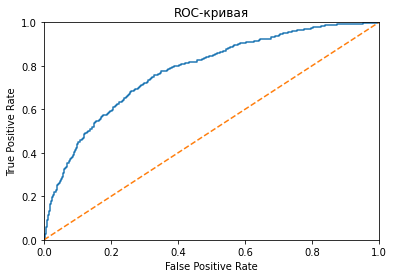

In [61]:
final_model_probabilities_one = model_LgR.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, final_model_probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-warning">
<h2>Комментарий ревьюера v8<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: после исправлений опечаток при подборе гиперпараметров, не забудь убедиться, что на финальном тестировании используется лучшая модель с прошлого этапа, скорее всего, этого будет достаточно, чтобы получить необходимое значение F1.
    
Также в ячейке выше для расчета вероятностей используется логистическая регрессия, а не лучшая модель, нужно поправить</div>

Финальная достигла заданой метрики (F1 > 0.59) и показывает адекватные результаты.
Модель характеризуется высоким показателем полноты = 0.738 (min = 0, max = 1), поэтому она с высокой вероятностью предскажит уход клиента из банка.
Показатель точности не высокий = 0.508 (min = 0, max = 1) — модель верно предсказывает только половину ухода клиентов.
С точки зрения бизнеса полученная модель поможет маркетологам лучше определять килентов, которые могут уйти в ближайшее время. Важно, что модель покрывает большое количество клиентов, в данном случае это важнее чем точность.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Надеюсь, теперь стало понятнее :)

Я проверил сделанную часть и сразу хочу обратить твое внимание на следующее:
* перепроверь этап с заполнением пропусков;
* поправь переменную с закодированной выборкой
* для сравнения моделей необходимо рассчитать F1 и AUC-ROC

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Теперь весь проект на месте, супер!

Осталось поправить несколько недоработок и проект будет зачтен:
* поправь расчет AUC-ROC во всем проекте;
* подбери гиперпараметры для моделей на каждом этапе;
* не используй взвешивание классов вместе с upsampling;
* проверь еще хотя бы один способ борьбы с дисбалансом для всех моделей;

Не стесняйся задавать вопросы, если что-то непонятно

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*